In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import joblib
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
# Assuming X contains your feature matrix with mixed data types
# Here's a sample pipeline for preprocessing
numeric_features = ['numeric_feature_1', 'numeric_feature_2', ...]  # Specify your numeric feature column names
categorical_features = ['categorical_feature_1', 'categorical_feature_2', ...]  # Specify your categorical feature column names

In [3]:
# Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
mpl.style.use('ggplot') # for ggplot-like style

In [4]:
cdata=pd.read_csv('CLV.csv')

In [5]:
cdata.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [6]:
len(cdata)

303

In [7]:
# Descriptive statistics of the dataset
cdata.describe() 

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


In [8]:
len(cdata)

303

In [9]:
# Check missing values
cdata.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

Text(0.5, 0, 'Income / spend ')

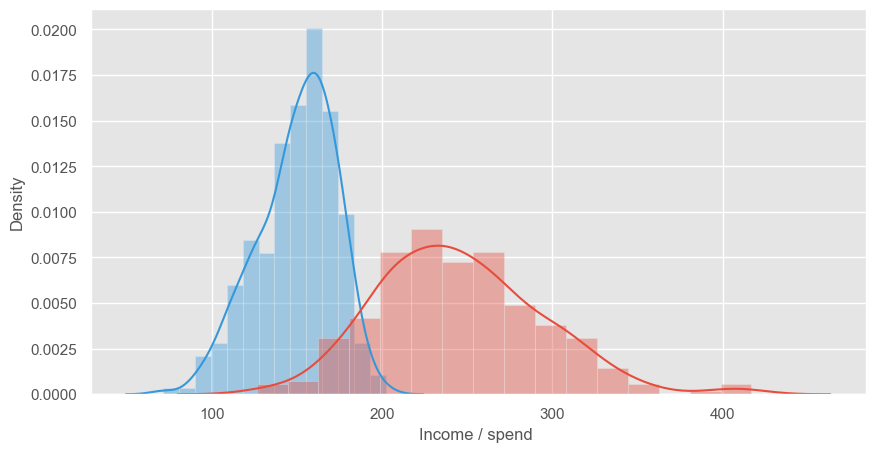

In [10]:
# Visualize data
plot_spend=sns.distplot(cdata['SPEND'], color="#3498db")
plot_income=sns.distplot(cdata['INCOME'], color="#e74c3c")
plt.xlabel('Income / spend ')

[(0.0, 420.0)]

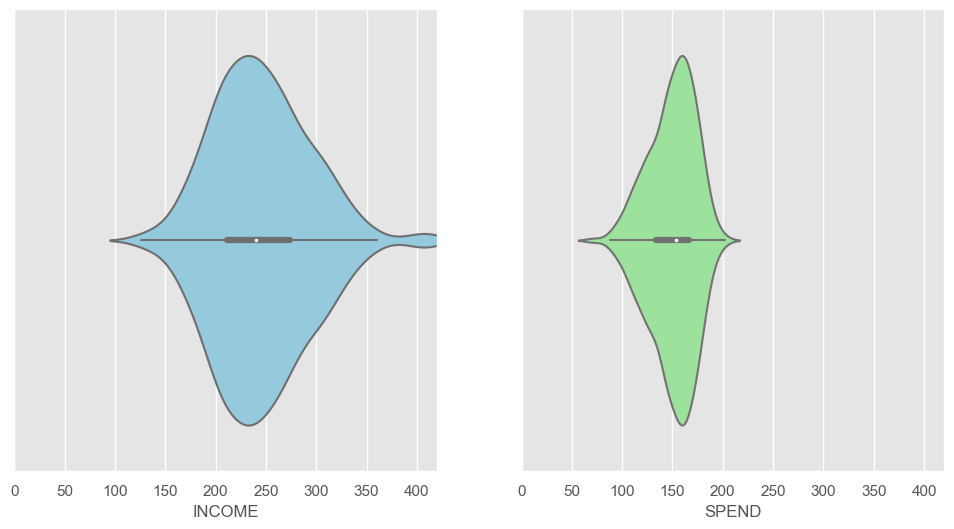

In [11]:
#Violin plot of Income and Spend
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=cdata, x='INCOME', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=cdata, x='SPEND',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

In [13]:
cdata

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [14]:
cdata.to_numpy()

array([[233, 150],
       [250, 187],
       [204, 172],
       [236, 178],
       [354, 163],
       [192, 148],
       [294, 153],
       [263, 173],
       [199, 162],
       [168, 174],
       [239, 160],
       [275, 139],
       [266, 171],
       [211, 144],
       [283, 162],
       [219, 158],
       [340, 172],
       [226, 114],
       [247, 171],
       [239, 151],
       [234, 161],
       [233, 179],
       [226, 178],
       [243, 137],
       [199, 178],
       [302, 162],
       [212, 157],
       [175, 123],
       [417, 157],
       [197, 152],
       [198, 168],
       [177, 140],
       [219, 188],
       [273, 152],
       [213, 125],
       [177, 160],
       [304, 170],
       [232, 165],
       [269, 148],
       [360, 151],
       [308, 142],
       [245, 180],
       [208, 148],
       [264, 143],
       [321, 182],
       [325, 172],
       [235, 180],
       [257, 156],
       [216, 115],
       [234, 160],
       [256, 149],
       [302, 151],
       [231,

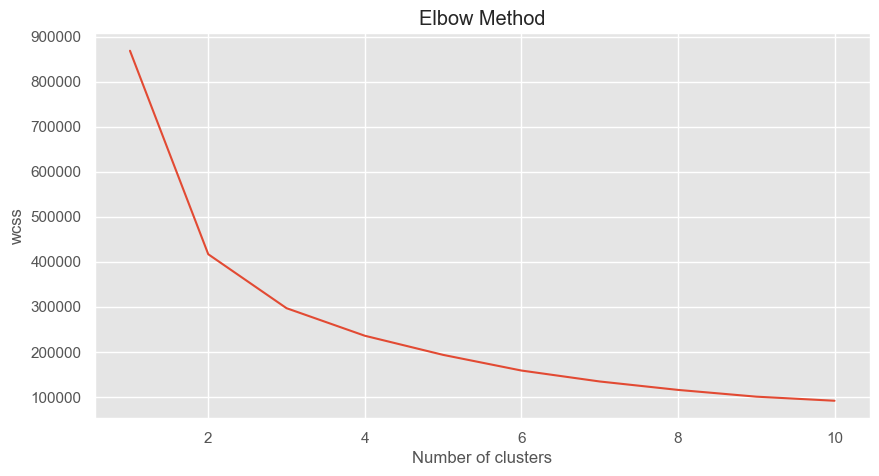

In [15]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = [] #minimizing within cluster sum of square 
X=cdata.to_numpy()
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0) 
    #n_init set the number of time the k-means algorithm will be run with different centroid seeds.
    #k-means++ provides a smart initialization. This method tries to spread out the initial set of centroids so that they are not too close together. 
    #k-means++ is known to improve the quality of local optima and lower average runtime.
    #max_iter set the maximum number of iterations of the k-means algorithm for a single run.
    #About random_state: If random_state is an integer, then it is used to seed a new RandomState object.
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [96]:
#model fitting
#Fitting the k-means to the dataset with k=4
a = np.array([[1, 2], [1, 4], [1, 0],
            [10, 2], [10, 4], [10, 0]])

In [97]:
a

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [17]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X) #fit_predict compute cluster centers and predict cluster index for each sample.
# y_means are the predicted cluster indexes. Cluster idexes are from 0-3 since there are only 4 clusters

In [18]:
y_means

array([0, 0, 3, 0, 2, 3, 2, 0, 3, 3, 0, 1, 0, 3, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 1, 3, 2, 3, 3, 2, 3, 3, 3, 0, 1, 3, 3, 2, 0, 1, 2, 2, 0, 3, 1,
       2, 2, 0, 0, 3, 0, 0, 2, 0, 3, 0, 3, 0, 0, 3, 2, 1, 2, 3, 3, 3, 3,
       0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 2, 1, 0, 1, 3,
       3, 1, 0, 3, 0, 2, 3, 1, 2, 0, 2, 0, 0, 1, 3, 0, 3, 3, 1, 0, 0, 0,
       2, 3, 2, 3, 0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 3, 0, 3, 0, 3, 1, 3, 0,
       2, 0, 2, 0, 3, 3, 3, 1, 2, 2, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 1,
       0, 3, 0, 3, 3, 0, 0, 2, 3, 3, 3, 1, 1, 0, 1, 3, 1, 0, 2, 0, 3, 3,
       0, 2, 3, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 3, 2, 3, 3, 1, 3, 2, 0, 0,
       1, 0, 3, 1, 1, 1, 3, 0, 0, 0, 3, 3, 0, 1, 3, 2, 1, 2, 1, 2, 1, 0,
       2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       3, 1, 3, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 3, 0, 0, 0, 0, 1, 0,
       3, 3, 2, 3, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 3, 2, 3, 3, 0, 3, 2,
       3, 0, 2, 3, 3, 2, 0, 3, 3, 3, 3, 3, 1, 1, 3,

In [19]:
X[y_means==3]

array([[204, 172],
       [192, 148],
       [199, 162],
       [168, 174],
       [211, 144],
       [199, 178],
       [212, 157],
       [175, 123],
       [197, 152],
       [198, 168],
       [177, 140],
       [213, 125],
       [177, 160],
       [208, 148],
       [216, 115],
       [141, 175],
       [201, 158],
       [182, 174],
       [186, 190],
       [203, 132],
       [211, 165],
       [183, 182],
       [209, 163],
       [205, 184],
       [197, 156],
       [214, 158],
       [207, 168],
       [160, 138],
       [195, 179],
       [196, 163],
       [211, 115],
       [126, 173],
       [211, 161],
       [193, 162],
       [204, 172],
       [199, 179],
       [204, 143],
       [196, 169],
       [201, 163],
       [178,  96],
       [208, 140],
       [201, 126],
       [209, 173],
       [197, 116],
       [180, 150],
       [149, 125],
       [197, 131],
       [192, 174],
       [220, 144],
       [157, 182],
       [175, 173],
       [175, 173],
       [203,

In [20]:
X[y_means==3]

array([[204, 172],
       [192, 148],
       [199, 162],
       [168, 174],
       [211, 144],
       [199, 178],
       [212, 157],
       [175, 123],
       [197, 152],
       [198, 168],
       [177, 140],
       [213, 125],
       [177, 160],
       [208, 148],
       [216, 115],
       [141, 175],
       [201, 158],
       [182, 174],
       [186, 190],
       [203, 132],
       [211, 165],
       [183, 182],
       [209, 163],
       [205, 184],
       [197, 156],
       [214, 158],
       [207, 168],
       [160, 138],
       [195, 179],
       [196, 163],
       [211, 115],
       [126, 173],
       [211, 161],
       [193, 162],
       [204, 172],
       [199, 179],
       [204, 143],
       [196, 169],
       [201, 163],
       [178,  96],
       [208, 140],
       [201, 126],
       [209, 173],
       [197, 116],
       [180, 150],
       [149, 125],
       [197, 131],
       [192, 174],
       [220, 144],
       [157, 182],
       [175, 173],
       [175, 173],
       [203,

In [21]:
X[y_means==3,1]

array([172, 148, 162, 174, 144, 178, 157, 123, 152, 168, 140, 125, 160,
       148, 115, 175, 158, 174, 190, 132, 165, 182, 163, 184, 156, 158,
       168, 138, 179, 163, 115, 173, 161, 162, 172, 179, 143, 169, 163,
        96, 140, 126, 173, 116, 150, 125, 131, 174, 144, 182, 173, 173,
       155, 132, 114, 120, 158, 131, 113, 155, 177, 145, 139, 162, 140,
       111, 125, 130, 132, 105, 126, 108, 132, 126, 125, 156, 134, 138,
       162, 130, 161, 150, 144, 144, 136,  90, 141, 115], dtype=int64)

In [24]:
km4.cluster_centers_

array([[240.2371134 , 164.98969072],
       [260.54237288, 125.37288136],
       [317.6440678 , 152.3559322 ],
       [192.06818182, 147.19318182]])

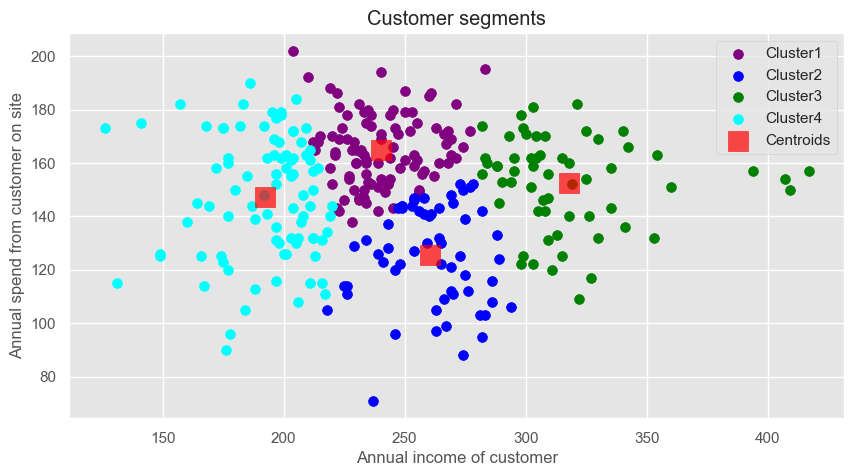

In [26]:
#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1') #s : scalar or array_like, shape (n, ),means the size of each scatter
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
#X[y_means==3,0] returns the x axis (income) value when y_means==3;
#X[y_means==3,1] returns the y axis (spend) value when y_means==3;

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
#plt.scatter(km4.cluster_centers_[:,0] returns the first column and all rows
#km4.cluster_centers_[1,:] returns the values of the first row and all columns

plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

In [29]:
km4.predict([[264,132]])

array([1])

In [30]:
joblib.dump(km4,"customer segmentation")

['customer segmentation']

In [32]:
model =joblib.load("customer segmentation")

In [35]:
model.predict([[204,172]])

array([3])

In [105]:
joblib.dump(km4, 'kmeans_model.joblib')

['kmeans_model.joblib']

In [36]:
from tkinter import *
import joblib

In [38]:
from tkinter import Tk, Label, Entry, Button, messagebox
import joblib

def show_entry_fields():
    try:
        p1 = int(e1.get())
        p2 = int(e2.get())
        
        model = joblib.load("Customer segmentation")
        result = model.predict([[p1, p2]])

        if result[0] == 0:
            label_result.config(text="Customers with medium annual income and medium annual spend")
        elif result[0] == 1:
            label_result.config(text="Customers with high annual income but low annual spend")
        elif result[0] == 2:
            label_result.config(text="Customers with low annual income but high annual spend")
        elif result[0] == 3:
            label_result.config(text="Customers with high annual income and high annual spend")

    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values for Annual Income and Spending Score")

# Create the main window
master = Tk()
master.title("Customer Segmentation using Machine Learning")

# Create labels, entries, and button
Label(master, text="Customer Segmentation using Machine Learning", bg="black", fg="white").grid(row=0, columnspan=2)
Label(master, text="Annual Income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text="Predict", command=show_entry_fields).grid(row=3, columnspan=2)

# Label to display the result
label_result = Label(master, text="")
label_result.grid(row=4, columnspan=2)

# Run the Tkinter event loop
master.mainloop()
